# Dataset source:
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# EDA

In [277]:
fat_df = pd.read_csv('bodyfat.csv')

In [278]:
fat_df.sample(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
218,1.0433,24.5,52,199.25,71.75,39.4,106.8,100.0,105.0,63.9,39.2,22.9,35.7,30.4,19.2
166,1.0492,21.8,35,166.25,68.00,38.5,99.1,90.4,95.6,55.5,34.2,21.9,30.2,28.7,17.7
207,1.0254,32.8,47,195.00,72.50,40.2,102.7,101.3,101.7,60.7,39.4,23.3,36.7,31.6,18.4
121,1.0414,25.3,44,185.25,71.50,39.5,99.2,98.1,101.4,57.1,40.5,23.2,33.0,29.6,18.4
140,1.0422,24.9,40,176.75,71.00,37.4,98.6,93.1,101.6,59.1,39.6,21.6,30.8,27.9,16.6
33,1.0502,21.3,41,218.50,71.00,39.8,111.7,100.5,108.3,67.1,44.2,25.2,37.5,31.5,18.7
202,1.0340,28.7,43,200.50,71.50,37.9,107.2,103.1,105.5,68.8,38.3,23.7,32.1,28.9,18.7
154,1.0510,21.0,27,200.25,73.50,38.2,101.1,100.1,105.0,62.1,40.0,24.9,33.7,29.2,19.4
185,1.0794,8.6,40,167.50,71.50,39.4,89.5,83.7,98.1,57.3,39.7,22.6,32.9,29.3,18.2
177,1.0316,29.9,37,241.25,71.50,42.1,119.2,110.3,113.9,69.8,42.6,24.8,34.4,29.5,18.4


In [279]:
fat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [280]:
fat_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [281]:
fat_df.shape

(252, 15)

In [282]:
fat_df.isnull().values.any()

False

In [283]:
(fat_df == 0).sum()

Density    0
BodyFat    1
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [284]:
fat_df.loc[fat_df['BodyFat']==0.0]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
181,1.1089,0.0,40,118.5,68.0,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [285]:
fat_df.drop(fat_df[fat_df['BodyFat'] == 0].index, axis=0, inplace=True)

In [286]:
fat_df.loc[fat_df['BodyFat']==0]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


# Splitting dataset into train and test sets.

In [287]:
X = fat_df.drop('BodyFat', axis = 1)
y = fat_df['BodyFat']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Checking split

c:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


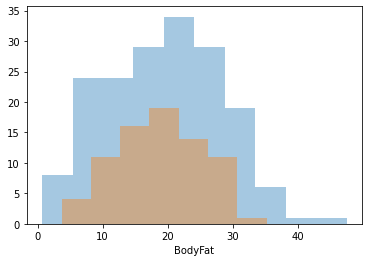

In [288]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

In [289]:
from scipy import stats
#Performs the Kolmogorov-Smirnov test for goodness of fit.
stats.kstest(y_train, y_test)

KstestResult(statistic=0.14218045112781955, pvalue=0.20872174796385778)

In [290]:
X_train.shape

(175, 14)

In [291]:
X_test.shape

(76, 14)

In [292]:
y_train.shape

(175,)

In [293]:
y_test.shape

(76,)

In [294]:
X_train.describe(include='all')

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.00000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,1.055163,44.474286,178.290286,69.890000,37.952000,100.804000,92.556571,99.88400,59.346286,38.514857,23.065714,32.154286,28.692571,18.238857
std,0.020143,12.872861,27.734305,4.026364,2.356059,8.379685,10.566666,6.89944,5.193395,2.385012,1.554035,3.034528,2.073367,0.954649
min,0.995000,22.000000,125.250000,29.500000,31.100000,83.400000,70.400000,85.30000,49.300000,33.000000,19.700000,24.800000,21.000000,15.800000
25%,1.040700,35.000000,159.000000,68.125000,36.400000,94.000000,84.450000,95.25000,55.900000,36.900000,22.050000,30.150000,27.300000,17.600000
50%,1.053800,44.000000,176.750000,70.000000,38.000000,99.800000,90.900000,99.30000,59.000000,38.400000,22.800000,31.800000,28.800000,18.300000
75%,1.071950,52.500000,199.000000,71.875000,39.650000,105.800000,99.750000,103.80000,62.200000,39.950000,24.000000,34.550000,30.100000,18.800000
max,1.099100,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,125.60000,74.400000,46.000000,33.700000,39.100000,33.800000,21.400000


In [ ]:
y_train.describe(include='all')

In [296]:
y_train.loc[y_train < 1.0]

171    0.7
Name: BodyFat, dtype: float64

<AxesSubplot:>

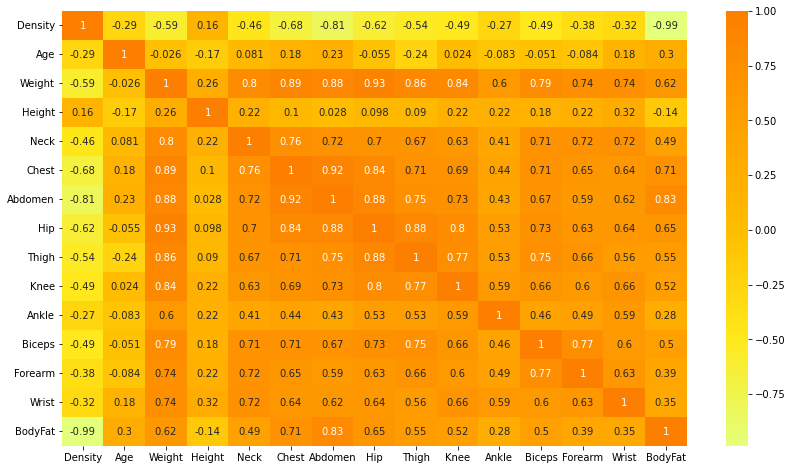

In [297]:
plt.figure(figsize=(14,8))
sns.heatmap(X_train.join(y_train).corr(),cmap='Wistia', annot=True)

In [298]:
def corr_threshold(corr, threshold = 0.65):

    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    corr[mask] = np.nan
    corr_th = corr.stack()[corr.stack().abs() > threshold]
    return(corr_th)

In [299]:
threshold = 0.7
corr = X_train.corr()
corr_th = corr_threshold(corr, threshold)
corr_th

Neck     Weight     0.797931
Chest    Weight     0.894889
         Neck       0.760260
Abdomen  Density   -0.812334
         Weight     0.880396
         Neck       0.718962
         Chest      0.915648
Hip      Weight     0.932450
         Chest      0.838669
         Abdomen    0.876559
Thigh    Weight     0.860249
         Chest      0.707521
         Abdomen    0.745287
         Hip        0.882434
Knee     Weight     0.839927
         Abdomen    0.725148
         Hip        0.798589
         Thigh      0.768279
Biceps   Weight     0.791290
         Neck       0.706361
         Chest      0.711415
         Hip        0.729454
         Thigh      0.751869
Forearm  Weight     0.742304
         Neck       0.717256
         Biceps     0.769251
Wrist    Weight     0.740606
         Neck       0.721802
dtype: float64

## Removing correlated features

In [300]:
X_train = X_train.drop(columns=['Neck','Chest', 'Abdomen', 'Hip', 'Weight', 'Knee', 'Biceps'])
X_test =  X_test.drop(columns=['Neck','Chest', 'Abdomen', 'Hip', 'Weight', 'Knee', 'Biceps'])

In [301]:
corr = X_train.corr()
corr_th = corr_threshold(corr, threshold)
corr_th

Series([], dtype: float64)

<AxesSubplot:>

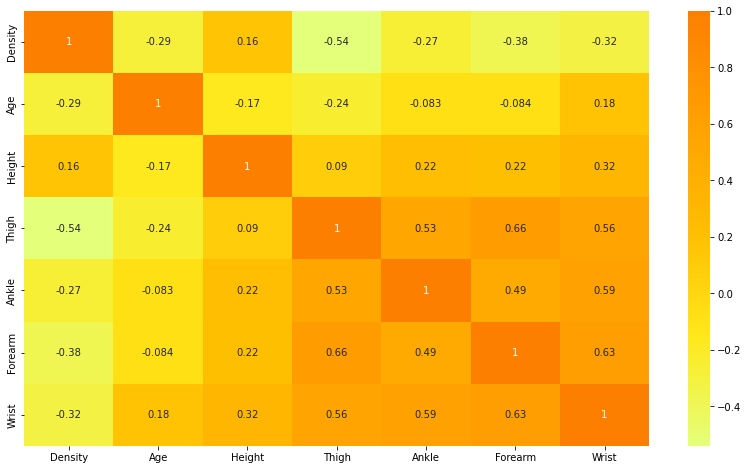

In [302]:
plt.figure(figsize=(14,8))
sns.heatmap(X_train.corr(),cmap='Wistia', annot=True)

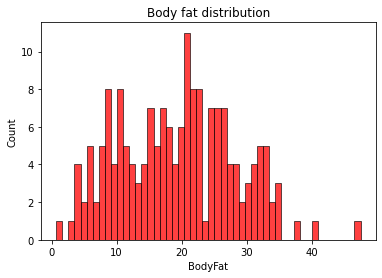

In [303]:
fig, ax = plt.subplots()
sns.histplot(y_train, bins=50, color='r')
ax.set_title("Body fat distribution")
plt.show()

In [304]:
def outlier_detection(features_series):

    Q1 = features_series.quantile(0.25)
    Q3 = features_series.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outlier = features_series[
        (features_series > upper_end) | (features_series < lower_end)
    ]
    return outlier

In [305]:
for column in X_train.join(y_train).select_dtypes("float64").columns:
    print(f"Outliers in column {column}")
    outlier = outlier_detection(X_train.join(y_train)[column])
    print(outlier)

Outliers in column Density
Series([], Name: Density, dtype: float64)
Outliers in column Height
95    77.75
41    29.50
Name: Height, dtype: float64
Outliers in column Thigh
168    74.4
40     72.5
151    72.9
Name: Thigh, dtype: float64
Outliers in column Ankle
85    33.7
Name: Ankle, dtype: float64
Outliers in column Forearm
225    22.0
174    21.0
Name: Forearm, dtype: float64
Outliers in column Wrist
40     21.4
225    15.8
251    20.9
Name: Wrist, dtype: float64
Outliers in column BodyFat
215    47.5
Name: BodyFat, dtype: float64


In [306]:
print(X_train.join(y_train).loc[[40]])

    Density  Age  Height  Thigh  Ankle  Forearm  Wrist  BodyFat
40   1.0217   45   68.75   72.5   26.6     32.7   21.4     34.5


In [307]:
X_train.shape

(175, 7)

# Scaling dataset

In [308]:
ss_x = StandardScaler()

ss_x.fit(X_train)
X_train_scaled = ss_x.transform(X_train)
X_test_scaled = ss_x.transform(X_test)

Text(0.5, 1.0, 'X_train data scaled')

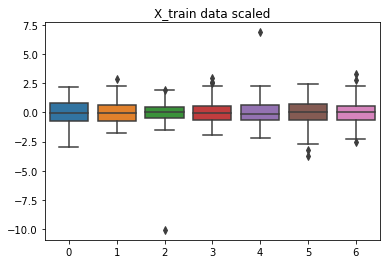

In [309]:
sns.boxplot(data=X_train_scaled)
plt.title("X_train data scaled")

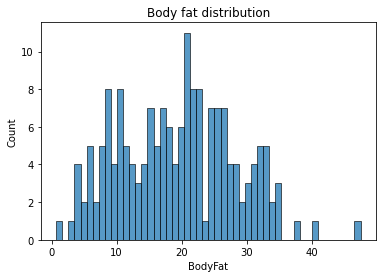

In [310]:
fig, ax = plt.subplots()
sns.histplot(y_train, bins=50)
ax.set_title("Body fat distribution")
plt.show()

# Linear model

In [311]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)


LinearRegression()

# Polynomial

In [312]:
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)

model_poly_2deg = LinearRegression()
model_poly_3deg = LinearRegression()



continous_features_ls = X_train.select_dtypes("float64").columns.to_list()
X_train_poly_2 = poly_2.fit_transform(X_train_scaled)
X_train_poly_3 = poly_3.fit_transform(X_train_scaled)
X_test_poly_2 = poly_2.transform(X_test_scaled)
X_test_poly_3 = poly_3.transform(X_test_scaled)


model_poly_2deg.fit(X_train_poly_2, y_train)
model_poly_3deg.fit(X_train_poly_3, y_train)

LinearRegression()

# Predictions of regression models

In [313]:
#Linear
pred_1deg_train = model_linear.predict(X_train_scaled)
pred_1deg_test = model_linear.predict(X_test_scaled)

#2nd degree
pred_2deg_train = model_poly_2deg.predict(X_train_poly_2)
pred_2deg_test = model_poly_2deg.predict(X_test_poly_2)

#3rd degree
pred_3deg_train = model_poly_3deg.predict(X_train_poly_3)
pred_3deg_test = model_poly_3deg.predict(X_test_poly_3)

In [314]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


In [315]:
rounded_to = 5
result = []
for i in range(len(pred_2deg_test)):
    result.append([pred_1deg_test[i].round(rounded_to),pred_2deg_test[i].round(rounded_to),pred_3deg_test[i].round(rounded_to),y_test.iloc[i].round(rounded_to)])
    
r = pd.DataFrame(result, columns=['1st degree', '2nd degree', '3rd degree', 'truth'])
r

,1st degree,2nd degree,3rd degree,truth
0,17.05643,16.26340,13.97227,17.3
1,18.81150,18.97121,19.40455,19.2
2,27.11425,27.06553,26.81688,27.3
3,26.90404,28.42659,28.50335,26.1
4,21.38275,21.23800,21.26375,21.3
...,...,...,...,...
71,14.66373,14.17078,14.52976,18.5
72,27.63878,27.77806,27.88317,28.0
73,25.27059,25.65734,26.57904,24.8
74,17.47687,17.02247,14.54845,17.5


explained_variance:  0.9739
r2:  0.9739
MAE:  0.5284
MSE:  2.058
RMSE:  1.4346


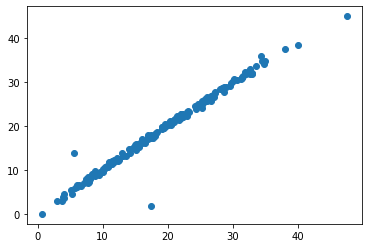

In [316]:
regression_results(y_train, pred_1deg_train)

fig, ax = plt.subplots()
ax.scatter(y_train, pred_1deg_train)
plt.show()

explained_variance:  0.9914
r2:  0.9911
MAE:  0.4152
MSE:  0.3989
RMSE:  0.6316


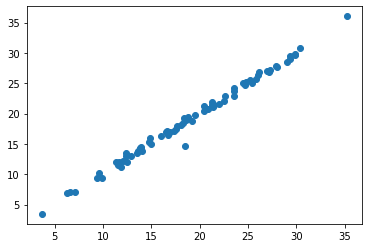

In [317]:
regression_results(y_test, pred_1deg_test)

fig, ax = plt.subplots()
ax.scatter(y_test, pred_1deg_test)
plt.show()

explained_variance:  0.9908
r2:  0.9908
MAE:  0.5063
MSE:  0.7217
RMSE:  0.8495


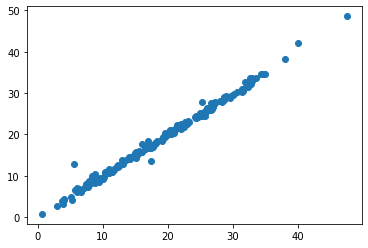

In [318]:
regression_results(y_train, pred_2deg_train)

fig, ax = plt.subplots()
ax.scatter(y_train, pred_2deg_train)
plt.show()

explained_variance:  0.9608
r2:  0.9605
MAE:  0.747
MSE:  1.7794
RMSE:  1.334


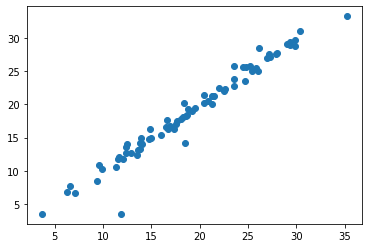

In [319]:
regression_results(y_test, pred_2deg_test)

fig, ax = plt.subplots()
ax.scatter(y_test, pred_2deg_test)
plt.show()

explained_variance:  0.9979
r2:  0.9979
MAE:  0.2571
MSE:  0.1635
RMSE:  0.4043


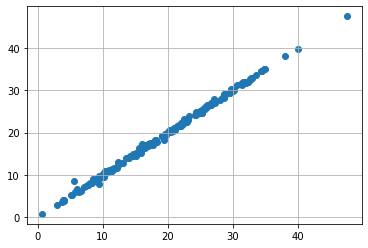

In [320]:
regression_results(y_train, pred_3deg_train)

fig, ax = plt.subplots()
ax.scatter(y_train, pred_3deg_train)
ax.grid()
plt.show()

explained_variance:  -2.5614
r2:  -2.5982
MAE:  3.326
MSE:  162.0315
RMSE:  12.7292


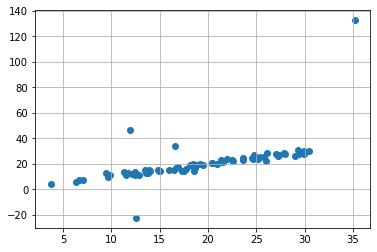

In [321]:
regression_results(y_test, pred_3deg_test)

fig, ax = plt.subplots()
ax.scatter(y_test, pred_3deg_test)
ax.grid()
plt.show()

# Let's test decision tree

In [322]:
model_tree = DecisionTreeRegressor(random_state=42)


tree_grid = {
    "max_depth": [int(x) for x in np.arange(5, 200, 5)],
    "min_samples_split": [int(x) for x in np.arange(2, 100, 5)],
    "max_leaf_nodes": [int(x) for x in np.arange(2, 100, 5)],
}

tree_gs = GridSearchCV(
    estimator=model_tree,
    param_grid=tree_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)


tree_gs.fit(X_train_scaled, y_train)

tree_gs.best_estimator_

Fitting 5 folds for each of 15600 candidates, totalling 78000 fits


DecisionTreeRegressor(max_depth=10, max_leaf_nodes=37, min_samples_split=7,
                      random_state=42)

In [323]:
tree_predict = tree_gs.predict(X_test)

c:\Users\barto\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


explained_variance:  0.0759
r2:  -1.7274
MAE:  9.3717
MSE:  122.8163
RMSE:  11.0823


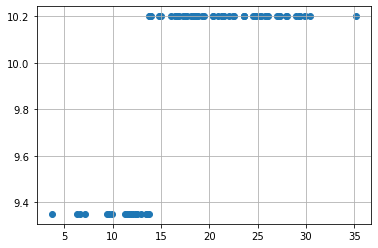

In [324]:
regression_results(y_test, tree_predict)

fig, ax = plt.subplots()
ax.scatter(y_test, tree_predict)
ax.grid()
plt.show()

# The best results were obtained by linear regression.

explained_variance:  0.9914
r2:  0.9911
MAE:  0.4152
MSE:  0.3989
RMSE:  0.6316


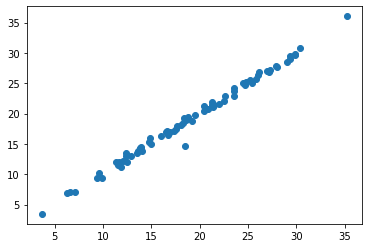

In [325]:
regression_results(y_test, pred_1deg_test)

fig, ax = plt.subplots()
ax.scatter(y_test, pred_1deg_test)
plt.show()